In [37]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline
%reload_ext autoreload
%autoreload(2)
warnings.filterwarnings('ignore')
np.random.seed(0)
plt.rcParams['figure.figsize']=12,12
bc=pd.read_csv("data.csv")
# bc.columns
bc.dropna(axis=1,how='any',inplace=True)
y=bc.iloc[:,2:32]
bc.T.head(190)

,0,1,2,3,4,5,6,7,8,9,...,559,560,561,562,563,564,565,566,567,568
id,842302,842517,84300903,84348301,84358402,843786,844359,84458202,844981,84501001,...,925291,925292,925311,925622,926125,926424,926682,926954,927241,92751
diagnosis,M,M,M,M,M,M,M,M,M,M,...,B,B,B,M,M,M,M,M,M,B
radius_mean,17.99,20.57,19.69,11.42,20.29,12.45,18.25,13.71,13,12.46,...,11.51,14.05,11.2,15.22,20.92,21.56,20.13,16.6,20.6,7.76
texture_mean,10.38,17.77,21.25,20.38,14.34,15.7,19.98,20.83,21.82,24.04,...,23.93,27.15,29.37,30.62,25.09,22.39,28.25,28.08,29.33,24.54
perimeter_mean,122.8,132.9,130,77.58,135.1,82.57,119.6,90.2,87.5,83.97,...,74.52,91.38,70.67,103.4,143,142,131.2,108.3,140.1,47.92
area_mean,1001,1326,1203,386.1,1297,477.1,1040,577.9,519.8,475.9,...,403.5,600.4,386,716.9,1347,1479,1261,858.1,1265,181
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003,0.1278,0.09463,0.1189,0.1273,0.1186,...,0.09261,0.09929,0.07449,0.1048,0.1099,0.111,0.0978,0.08455,0.1178,0.05263
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328,0.17,0.109,0.1645,0.1932,0.2396,...,0.1021,0.1126,0.03558,0.2087,0.2236,0.1159,0.1034,0.1023,0.277,0.04362
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198,0.1578,0.1127,0.09366,0.1859,0.2273,...,0.1112,0.04462,0,0.255,0.3174,0.2439,0.144,0.09251,0.3514,0
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043,0.08089,0.074,0.05985,0.09353,0.08543,...,0.04105,0.04304,0,0.09429,0.1474,0.1389,0.09791,0.05302,0.152,0


In [38]:
scalar=StandardScaler()
scalar.fit(y)
y=scalar.fit_transform(y)
y=pd.DataFrame(y)
y.head()
columns=[2,3,12,13,22,23]
y=y.drop(columns,axis=1)
yd=pd.get_dummies(bc['diagnosis'])
Y=yd.M

In [41]:
pca=PCA(n_components=0.95)
X=pca.fit_transform(y)
X=pd.DataFrame(X)
pca.explained_variance_ratio_.sum()
print(X.shape)

(569, 11)


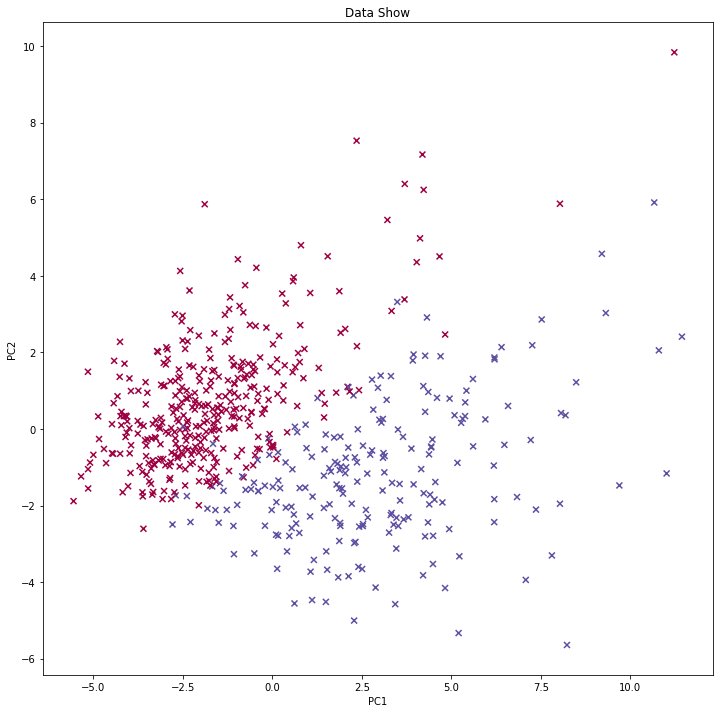

In [42]:
plt.scatter(x=X.loc[:,0],y=X.loc[:,1],c=yd.M,cmap="Spectral",marker='x')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Data Show")
plt.show()

In [43]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.20,random_state=0)
print(test_y.value_counts(normalize=True))

0    0.587719
1    0.412281
Name: M, dtype: float64


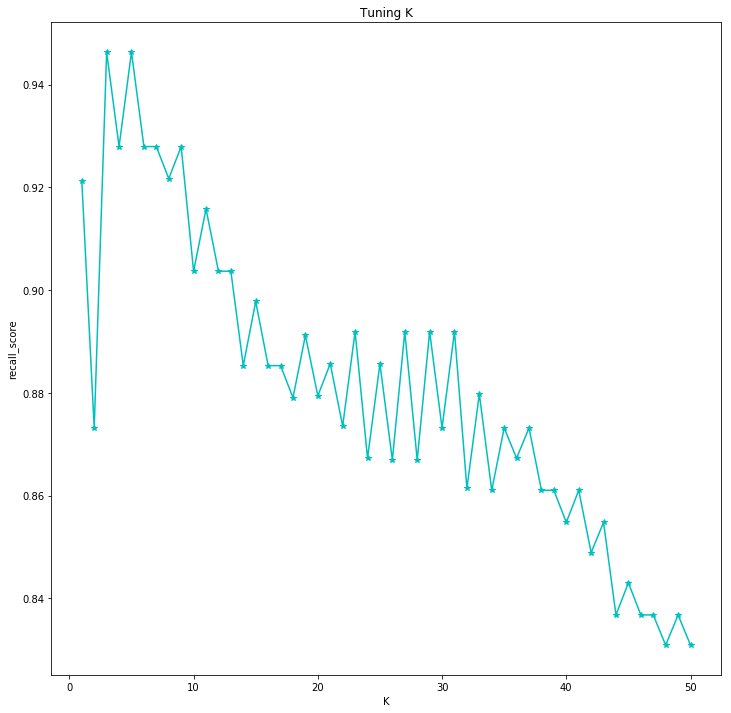

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
k_range=np.arange(1,51,1);lis=[]
for i in k_range:
    clf=KNeighborsClassifier(n_neighbors=i)
    lis.append(np.mean(cross_val_score(clf,train_x,train_y,cv=10,scoring="recall")))
lis=np.array(lis)
plt.plot(k_range,lis,color='c',marker='*')
plt.xlabel("K")
plt.ylabel("recall_score")
plt.title("Tuning K")
plt.show()

In [18]:
from sklearn.model_selection import GridSearchCV
ks=np.arange(1,51,1)
ps=[1,2]
leafs=np.arange(20,51,1)
params_grid={'n_neighbors':ks,'p':ps,'leaf_size':leafs}
score=['accuracy','recall','precision']
for s in score:
    gridcv=GridSearchCV(KNeighborsClassifier(),params_grid,scoring=s,cv=10,n_jobs=-1)
    print("Tuning hyperparameters for {}".format(s))
    gridcv.fit(train_x,train_y)
    y_pred=gridcv.predict(test_x)
    print(pd.DataFrame(confusion_matrix(test_y,y_pred),index=['neg','pos'],columns=['neg_pred','pos_pred']))
    print(gridcv.best_params_)
    print(np.round(gridcv.best_score_,3))

Tuning hyperparameters for accuracy
     neg_pred  pos_pred
neg        64         3
pos         3        44
{'leaf_size': 20, 'n_neighbors': 3, 'p': 1}
0.967
Tuning hyperparameters for recall
     neg_pred  pos_pred
neg        67         0
pos         5        42
{'leaf_size': 20, 'n_neighbors': 3, 'p': 2}
0.946
Tuning hyperparameters for precision
     neg_pred  pos_pred
neg        65         2
pos         7        40
{'leaf_size': 20, 'n_neighbors': 2, 'p': 1}
0.994


In [45]:
from sklearn.metrics import recall_score
train_x=pd.DataFrame(train_x)
test_x=pd.DataFrame(test_x)
clf=KNeighborsClassifier(n_neighbors=3,leaf_size=20,p=2)
clf.fit(train_x,train_y)
y_pred=clf.predict(test_x)
recall_score(test_y,y_pred)

0.8936170212765957

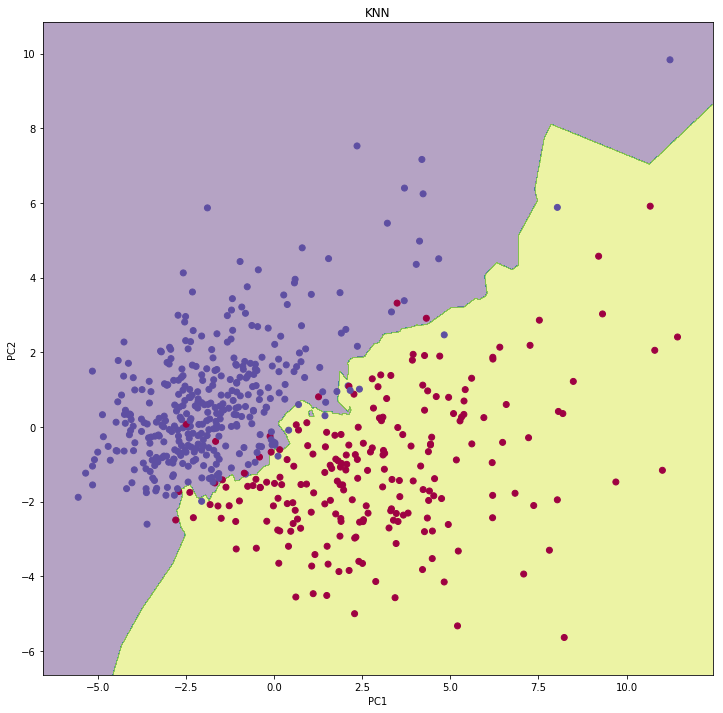

In [20]:
clf.fit(train_x.iloc[:,0:2],train_y)
x_min,x_max=X.iloc[:,0].min()-1,X.iloc[:,0].max()+1
y_min,y_max=X.iloc[:,1].min()-1,X.iloc[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.01),np.arange(y_min,y_max,0.01))
Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)
Z.shape
plt.contourf(xx,yy,Z,alpha=0.4)
plt.scatter(x=X.iloc[:,0],y=X.iloc[:,1],c=Y,cmap="Spectral_r")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("KNN")
plt.show()

In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
params_grid=[{'kernel':['rbf'],'gamma':[1e-2, 1e-3, 1e-4, 1e-5],'C':[0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
            {'kernel':['sigmoid'],'gamma':[1e-2, 1e-3, 1e-4, 1e-5],'C':[0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
             {'kernel':['poly'],'gamma':[1e-2, 1e-3, 1e-4, 1e-5],'C':[0.001, 0.10, 0.1, 10, 25, 50, 100, 1000],'degree':[0,1,2,3,4,5,6]},
            {'kernel':['linear'],'C':[0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}]
scorers=['accuracy','recall','precision']
skf=StratifiedKFold(n_splits=10)
for s in scorers:
    clf=GridSearchCV(SVC(),params_grid,scoring=s,cv=skf,n_jobs=-1)
    print("Tuning hyperparameters for {}".format(s))
    clf.fit(train_x,train_y)
    y_pred=clf.predict(test_x)
    print(pd.DataFrame(confusion_matrix(test_y,y_pred),index=['neg','pos'],columns=['neg_pred','pos_pred']))
    print(clf.best_params_)
    print(np.round(clf.best_score_,3))

Tuning hyperparameters for accuracy
     neg_pred  pos_pred
neg        67         0
pos         2        45
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.98
Tuning hyperparameters for recall
     neg_pred  pos_pred
neg        67         0
pos         2        45
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.964
Tuning hyperparameters for precision
     neg_pred  pos_pred
neg        67         0
pos        32        15
{'C': 25, 'gamma': 1e-05, 'kernel': 'sigmoid'}
1.0


In [31]:
from sklearn.svm import SVC
from sklearn.metrics import recall_score
clf=SVC(C=10,gamma=0.01,kernel='rbf')
clf.fit(train_x,train_y)
y_pred=clf.predict(test_x)
print(recall_score(test_y,y_pred))

0.9574468085106383


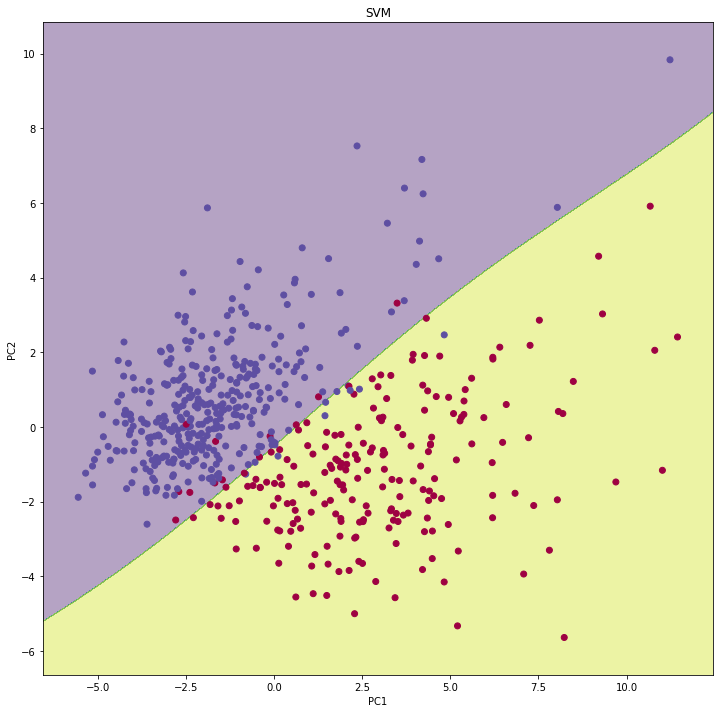

In [32]:
clf.fit(train_x.iloc[:,0:2],train_y)
x_min,x_max=X.iloc[:,0].min()-1,X.iloc[:,0].max()+1
y_min,y_max=X.iloc[:,1].min()-1,X.iloc[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.01),np.arange(y_min,y_max,0.01))
Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)
Z.shape
plt.contourf(xx,yy,Z,alpha=0.4)
plt.scatter(x=X.iloc[:,0],y=X.iloc[:,1],c=Y,cmap="Spectral_r")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("SVM")
plt.show()

In [33]:
from sklearn.linear_model import LogisticRegression
params_grid={'C':[0.001,0.01,0.1,1,10,100,1000]}
scorers=['accuracy','recall','precision']
skf=StratifiedKFold(n_splits=10)
for s in scorers:
    clf=GridSearchCV(LogisticRegression(),params_grid,scoring=s,cv=skf,n_jobs=-1)
    print("Tuning hyperparameters for {}".format(s))
    clf.fit(train_x,train_y)
    y_pred=clf.predict(test_x)
    print(pd.DataFrame(confusion_matrix(test_y,y_pred),index=['neg','pos'],columns=['neg_pred','pos_pred']))
    print(clf.best_params_)
    print(np.round(clf.best_score_,3))

Tuning hyperparameters for accuracy
     neg_pred  pos_pred
neg        66         1
pos         3        44
{'C': 1}
0.978
Tuning hyperparameters for recall
     neg_pred  pos_pred
neg        66         1
pos         3        44
{'C': 1}
0.964
Tuning hyperparameters for precision
     neg_pred  pos_pred
neg        66         1
pos         3        44
{'C': 1}
0.977


In [34]:
clf=LogisticRegression(C=1)
clf.fit(train_x,train_y)
y_pred=clf.predict(test_x)
print(recall_score(test_y,y_pred))

0.9361702127659575


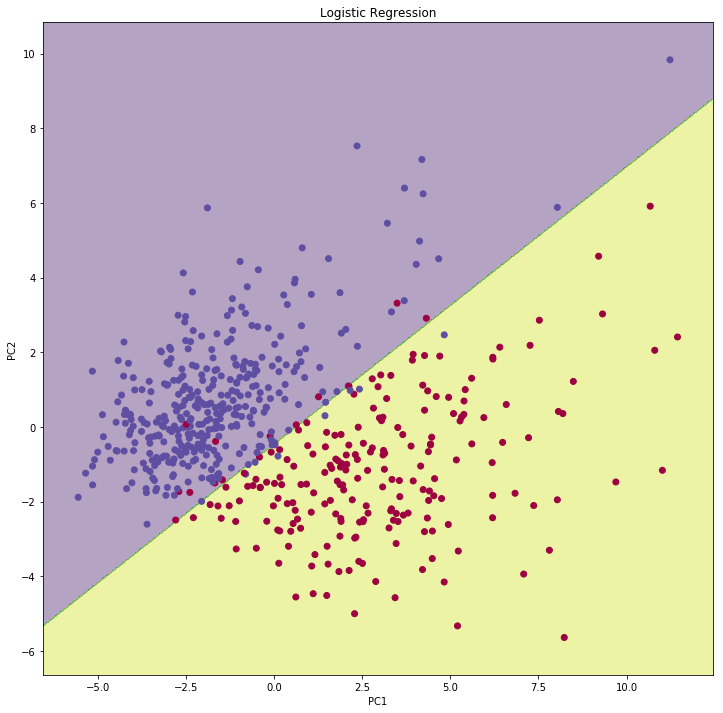

In [35]:
clf.fit(train_x.iloc[:,0:2],train_y)
x_min,x_max=X.iloc[:,0].min()-1,X.iloc[:,0].max()+1
y_min,y_max=X.iloc[:,1].min()-1,X.iloc[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.01),np.arange(y_min,y_max,0.01))
Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)
Z.shape
plt.contourf(xx,yy,Z,alpha=0.4)
plt.scatter(x=X.iloc[:,0],y=X.iloc[:,1],c=Y,cmap="Spectral_r")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Logistic Regression")
plt.show()

In [46]:
#Comparing KNN,SVM and Logistic Regression over the dataset
#------KNN-------#
from sklearn.metrics import accuracy_score,precision_score,recall_score
clf=KNeighborsClassifier(n_neighbors=3,leaf_size=20,p=2)
clf.fit(train_x,train_y)
y_pred=clf.predict(test_x)
df_knn=pd.DataFrame({'accuracy':accuracy_score(test_y,y_pred),'precision':precision_score(test_y,y_pred),'recall':recall_score(test_y,y_pred)},index=["KNN"])
#------SVM-------#
clf=SVC(C=10,gamma=0.01,kernel='rbf')
clf.fit(train_x,train_y)
y_pred=clf.predict(test_x)
df_svm=pd.DataFrame({'accuracy':accuracy_score(test_y,y_pred),'precision':precision_score(test_y,y_pred),'recall':recall_score(test_y,y_pred)},index=["SVM"])
df_svm.head()
#------LogisticRegression--------#
clf=LogisticRegression(C=1)
clf.fit(train_x,train_y)
y_pred=clf.predict(test_x)
df_logisticregression=pd.DataFrame({'accuracy':accuracy_score(test_y,y_pred),'precision':precision_score(test_y,y_pred),'recall':recall_score(test_y,y_pred)},index=["LogisticRegression"])
df_logisticregression.head()
frame=[df_knn ,df_svm ,df_logisticregression]
result=pd.concat(frame)
result.head()

,accuracy,precision,recall
KNN,0.956140,1.000000,0.893617
SVM,0.982456,1.000000,0.957447
LogisticRegression,0.964912,0.977778,0.936170


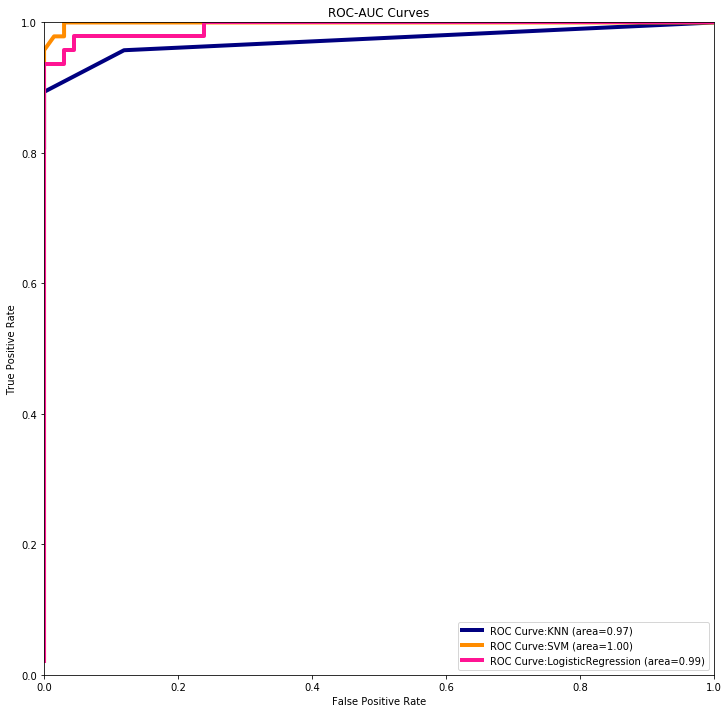

In [72]:
#Comparison using ROC-AUC curves:
from sklearn.metrics import roc_curve,roc_auc_score,auc
fpr=dict()
tpr=dict()
roc_auc=dict()
clf=KNeighborsClassifier(n_neighbors=3,leaf_size=20,p=2)
clf.fit(train_x,train_y)
y_score=clf.predict_proba(test_x)
# print(test_y.shape)
# roc_curve(test_y,y_score[:,1])
fpr['knn'],tpr['knn'],_=roc_curve(test_y,y_score[:,1])
roc_auc['knn']=auc(fpr['knn'],tpr['knn'])
clf=SVC(C=10,gamma=0.01,kernel='rbf',probability=True)
clf.fit(train_x,train_y)
y_score=clf.predict_proba(test_x)
fpr['svm'],tpr['svm'],_=roc_curve(test_y,y_score[:,1])
roc_auc['svm']=auc(fpr['svm'],tpr['svm'])
clf=LogisticRegression(C=1)
clf.fit(train_x,train_y)
y_score=clf.predict_proba(test_x)
fpr['logisticRegression'],tpr['logisticRegression'],_=roc_curve(test_y,y_score[:,1])
roc_auc['logisticRegression']=auc(fpr['logisticRegression'],tpr['logisticRegression'])
plt.plot(fpr["knn"],tpr["knn"],color="navy",lw=4,label="ROC Curve:KNN (area=%0.02f)"%roc_auc['knn'])
plt.plot(fpr["svm"],tpr["svm"],color="darkorange",lw=4,label="ROC Curve:SVM (area=%0.02f)"%roc_auc['svm'])
plt.plot(fpr["logisticRegression"],tpr["logisticRegression"],color="deeppink",lw=4,label="ROC Curve:LogisticRegression (area=%0.02f)"%roc_auc['logisticRegression'])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curves")
plt.legend(loc="lower right")
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()